In [2]:
#Importing Packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
pd.__version__

'0.25.1'

In [10]:
#Loading data
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

URL transformed to HTTPS due to an HSTS policy
--2020-03-08 19:18:57--  https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21050 (21K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii’

monthly.ao.index.b5 100%[===================>]  20.56K  --.-KB/s    in 0.02s   

2020-03-08 19:18:57 (849 KB/s) - ‘monthly.ao.index.b50.current.ascii’ saved [21050/21050]



In [11]:
#Saving data to variable
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

In [12]:
ao[0:2] #

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01]])

In [13]:
ao.shape

(842, 3)

In [15]:
#Time Series 
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29'],
              dtype='datetime64[ns]', length=842, freq='M')

In [16]:
dates.shape

(842,)

In [17]:
#Create Time Series 
AO = Series(ao[:,2], index=dates)

In [18]:
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
                ...   
2019-10-31   -0.082195
2019-11-30   -1.193400
2019-12-31    0.412070
2020-01-31    2.419000
2020-02-29    3.417200
Freq: M, Length: 842, dtype: float64

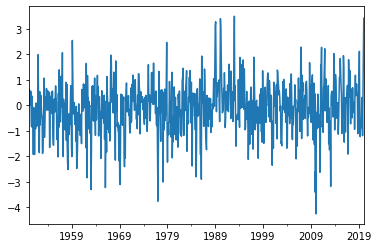

In [19]:
AO.plot()

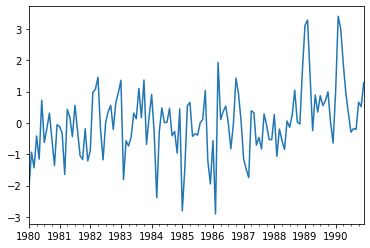

In [20]:
AO['1980':'1990'].plot()

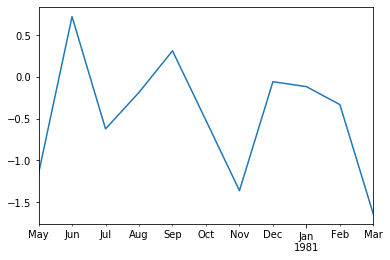

In [21]:
AO['1980-05':'1981-03'].plot()

In [22]:
AO[120] #Referencing by number

-2.4842

In [23]:
AO['1960-01'] #Referencing by calue

1960-01-31   -2.4842
Freq: M, dtype: float64

In [24]:
AO['1960']#Referencing 1 year

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

In [25]:
AO[AO > 0] #For non-negative values

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
                ...   
2019-03-31    2.116100
2019-09-30    0.306200
2019-12-31    0.412070
2020-01-31    2.419000
2020-02-29    3.417200
Length: 396, dtype: float64

In [26]:
#NAO- Time Series 
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii #Loading data

URL transformed to HTTPS due to an HSTS policy
--2020-03-08 19:21:37--  https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20184 (20K) [text/plain]
Saving to: ‘norm.nao.monthly.b5001.current.ascii’

norm.nao.monthly.b5 100%[===================>]  19.71K  --.-KB/s    in 0.03s   

2020-03-08 19:21:38 (667 KB/s) - ‘norm.nao.monthly.b5001.current.ascii’ saved [20184/20184]



In [27]:
#Preparing data for time series 
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=dates_nao)

In [28]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', length=841, freq='M')

In [29]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11645b210>,
      dtype=object)

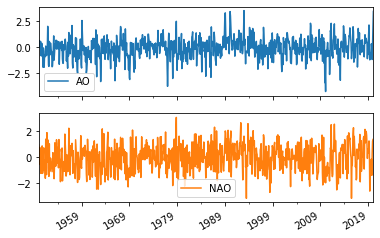

In [30]:
#Plotting the two dataframes
aonao.plot(subplots=True)

In [31]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


In [32]:
aonao['NAO'] #Selecting by name

1950-01-31    0.92000
1950-02-28    0.40000
1950-03-31   -0.36000
1950-04-30    0.73000
1950-05-31   -0.59000
               ...   
2019-10-31   -1.41340
2019-11-30    0.27847
2019-12-31    1.20160
2020-01-31    1.34320
2020-02-29        NaN
Freq: M, Name: NAO, Length: 842, dtype: float64

In [33]:
aonao.NAO #Selecting by variable

1950-01-31    0.92000
1950-02-28    0.40000
1950-03-31   -0.36000
1950-04-30    0.73000
1950-05-31   -0.59000
               ...   
2019-10-31   -1.41340
2019-11-30    0.27847
2019-12-31    1.20160
2020-01-31    1.34320
2020-02-29        NaN
Freq: M, Name: NAO, Length: 842, dtype: float64

In [34]:
aonao['Diff'] = aonao['AO'] - aonao['NAO'] #Creating column
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


In [35]:
del aonao['Diff'] #Deleting column
aonao.tail()

,AO,NAO
2019-10-31,-0.082195,-1.41340
2019-11-30,-1.193400,0.27847
2019-12-31,0.412070,1.20160
2020-01-31,2.419000,1.34320
2020-02-29,3.417200,NaN


In [36]:
aonao['1981-01':'1981-03'] #Slicing 

,AO,NAO
1981-01-31,-0.11634,0.37
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19


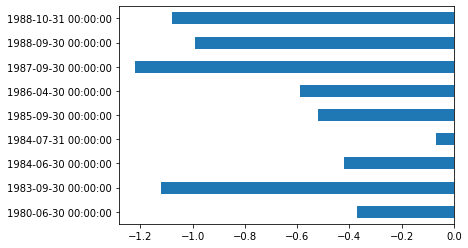

In [37]:
#Advanced indexing 
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

In [38]:
aonao.mean()

AO    -0.099993
NAO   -0.002171
dtype: float64

In [39]:
aonao.max()

AO     3.4953
NAO    3.0400
dtype: float64

In [40]:
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

In [41]:
aonao.mean(1) #Mean of each row

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
                ...   
2019-10-31   -0.747798
2019-11-30   -0.457465
2019-12-31    0.806835
2020-01-31    1.881100
2020-02-29    3.417200
Freq: M, Length: 842, dtype: float64

In [42]:
aonao.describe()

,AO,NAO
count,842.000000,841.000000
mean,-0.099993,-0.002171
std,1.009606,1.021176
min,-4.265700,-3.180000
25%,-0.651515,-0.750000
50%,-0.037124,0.060000
75%,0.485400,0.720000
max,3.495300,3.040000


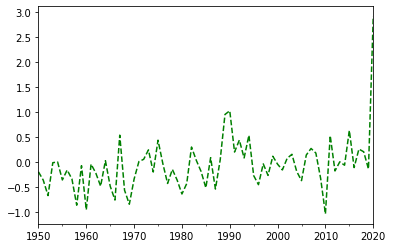

In [43]:
#Resampling 
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

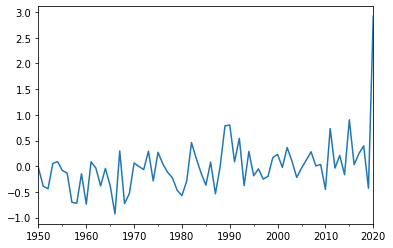

In [44]:
AO_mm = AO.resample("A").median()
AO_mm.plot()

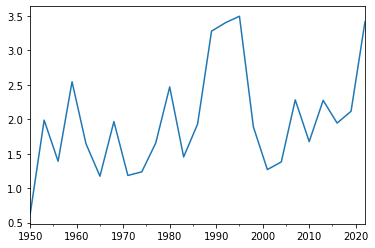

In [45]:
AO_mm = AO.resample("3A").apply(np.max)
AO_mm.plot()

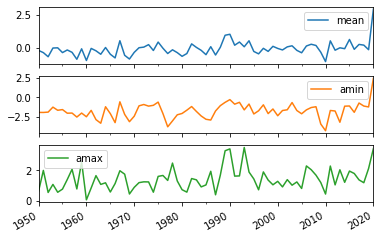

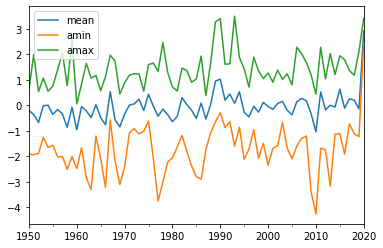

In [46]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

In [47]:
AO_mm

,mean,amin,amax
1950-12-31,-0.199501,-1.92810,0.62681
1951-12-31,-0.364626,-1.93410,1.98720
1952-12-31,-0.674990,-1.89090,0.53852
1953-12-31,-0.016515,-1.25580,1.06830
1954-12-31,-0.000770,-1.65610,0.55259
...,...,...,...
2016-12-31,-0.114137,-1.91730,1.78640
2017-12-31,0.256308,-0.73014,1.36540
2018-12-31,0.202732,-1.11620,1.17960
2019-12-31,-0.142024,-1.23130,2.11610


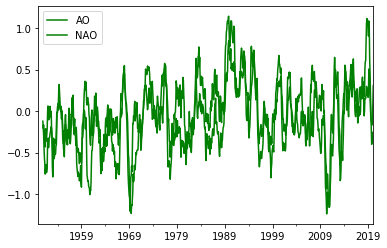

In [48]:
#Rolling statistics 
aonao.rolling(window=12, center=False).mean().plot(style='-g') #Rolling mean

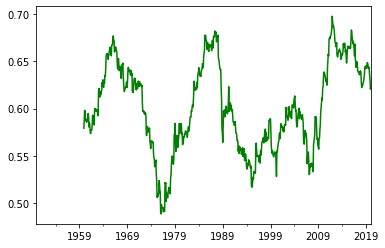

In [49]:
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g') #Rolling correlation

In [50]:
aonao.corr()

,AO,NAO
AO,1.000000,0.605904
NAO,0.605904,1.000000
